# Exercise 4 : Linear Regression
### Problems
### Problem 1 : Predicting SalePrice using GrLivArea
#### Note : We observed during EDA that GrLivArea and SalePrice have a strong linear relationship with correlation 0.71.
#### In this problem, you will build a Linear Regression model to predict SalePrice using GrLivArea and judge its accuracy.
#### a) Create appropriate datasets for Train and Test in an 80:20 ratio and fit a Linear Regression model on the Train set to predict SalePrice using GrLivArea. Print the coefficients of your model and plot the regression line.
##### b) Check the Goodness of Fit of the model on the Train set and Prediction Accuracy of the model on the Test set.
#### Print the metrics for Goodness of Fit and Prediction Accuracy that you think are appropriate in each scenario.
#### Hints and Pointers
#### o If you take just the first 80% of the data as train and the next 20% as test, it may not be the best train test split.
#### o If you obtain the coefficients for the regression line (intercept and coef), it should be easy to plot the line too.
#### o Goodness of Fit on train depends on the variance you explain, while prediction accuracy depends on the errors

In [25]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [26]:
housedata = pd.read_csv('train.csv')
housedata.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### Hypothetical Model: SalePrice = a x GrLivArea + b

In [27]:
# create dataframe for SalePrice ad GrLivArea
SalePrice = pd.DataFrame(housedata['SalePrice'])
GrLivArea = pd.DataFrame(housedata['GrLivArea'])

In [28]:
# Regression with random train-test split
# import sklearn models and functions
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

Intercept of Regression 	: b =  [18183.97477178]
Coefficients of Regression 	: a =  [[106.90692018]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.4944408170696579
Mean Squared Error (MSE) 	: 3188772528.272804
Root Mean Squared Error (RMSE) 	: 56469.21752842697

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.5316114025117784
Mean Squared Error (MSE) 	: 2946813267.9136066
Root Mean Squared Error (RMSE) 	: 54284.55828238456



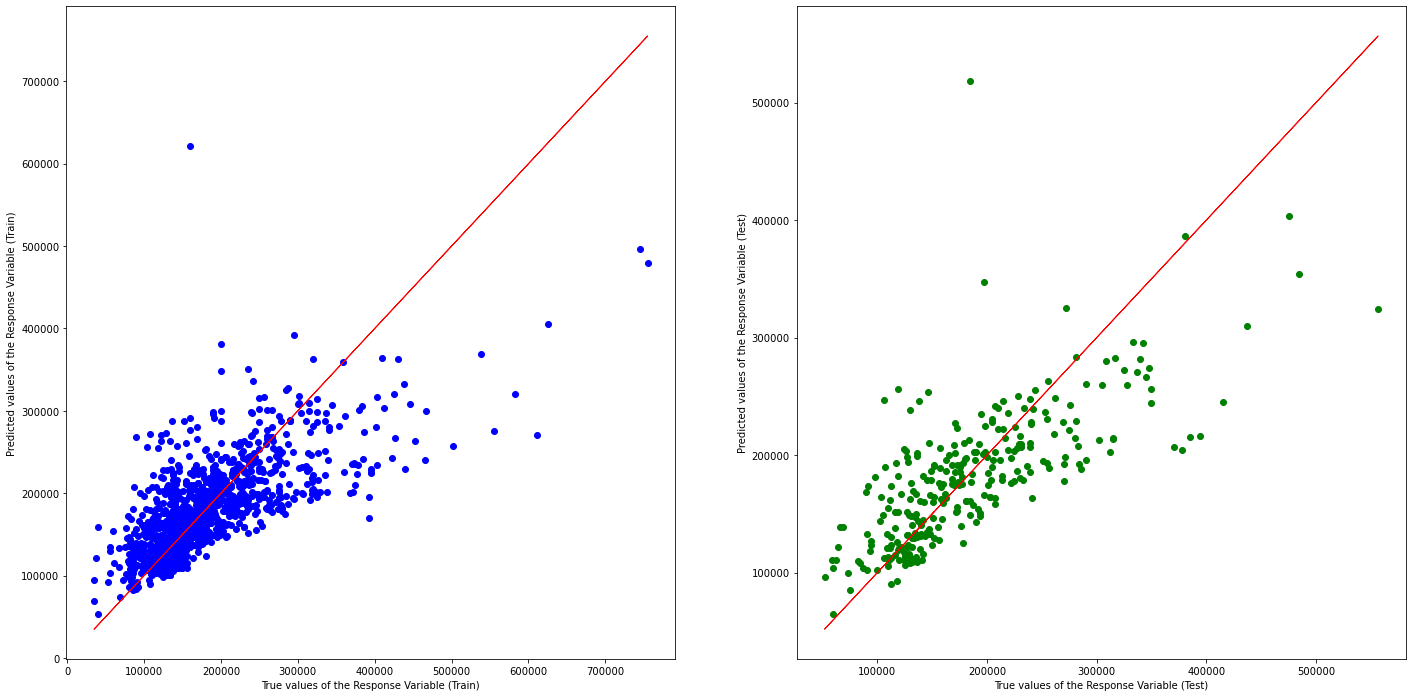

In [49]:
# Split the Dataset into Train and Test
X1_train, X1_test, y1_train, y1_test = train_test_split(GrLivArea, SalePrice, test_size = 0.20)

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X1_train, y1_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Predict Total values corresponding to HP
y_train_pred = linreg.predict(X1_train)
y_test_pred = linreg.predict(X1_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X1_train, y1_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y1_train, y_train_pred))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mean_squared_error(y1_train, y_train_pred)))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X1_test, y1_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y1_test, y_test_pred))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mean_squared_error(y1_test, y_test_pred)))
print()

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y1_train, y_train_pred, color = "blue")
axes[0].plot(y1_train, y1_train, 'r-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y1_test, y_test_pred, color = "green")
axes[1].plot(y1_test, y1_test, 'r-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

# Problem 2 : Predicting SalePrice using Other Variables
### Following the steps from the previous problem, build two new uni-variate Linear Regression models to predict SalePrice using the variables TotalBsmtSF and GarageArea, individually. Justify which of the three models is the best in this case.
> Hints and Pointers

> o Same as Problem 1, just on other variables. You can compare models using the metrics you are printing anyway.

> o Optional: You may think of writing a simple Python function to do regression on some variables in a given dataset

In [56]:
TotalBsmtSF = pd.DataFrame(housedata['TotalBsmtSF'])
GarageArea = pd.DataFrame(housedata['GarageArea'])

Intercept of Regression 	: c =  [64112.97494247]
Coefficients of Regression 	: d =  [[111.26416567]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.3682616844178196
Mean Squared Error (MSE) 	: 4078134242.7782316
Root Mean Squared Error (RMSE) 	: 63860.27123946649

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.4119629563663829
Mean Squared Error (MSE) 	: 3353072380.939411
Root Mean Squared Error (RMSE) 	: 57905.71976013605



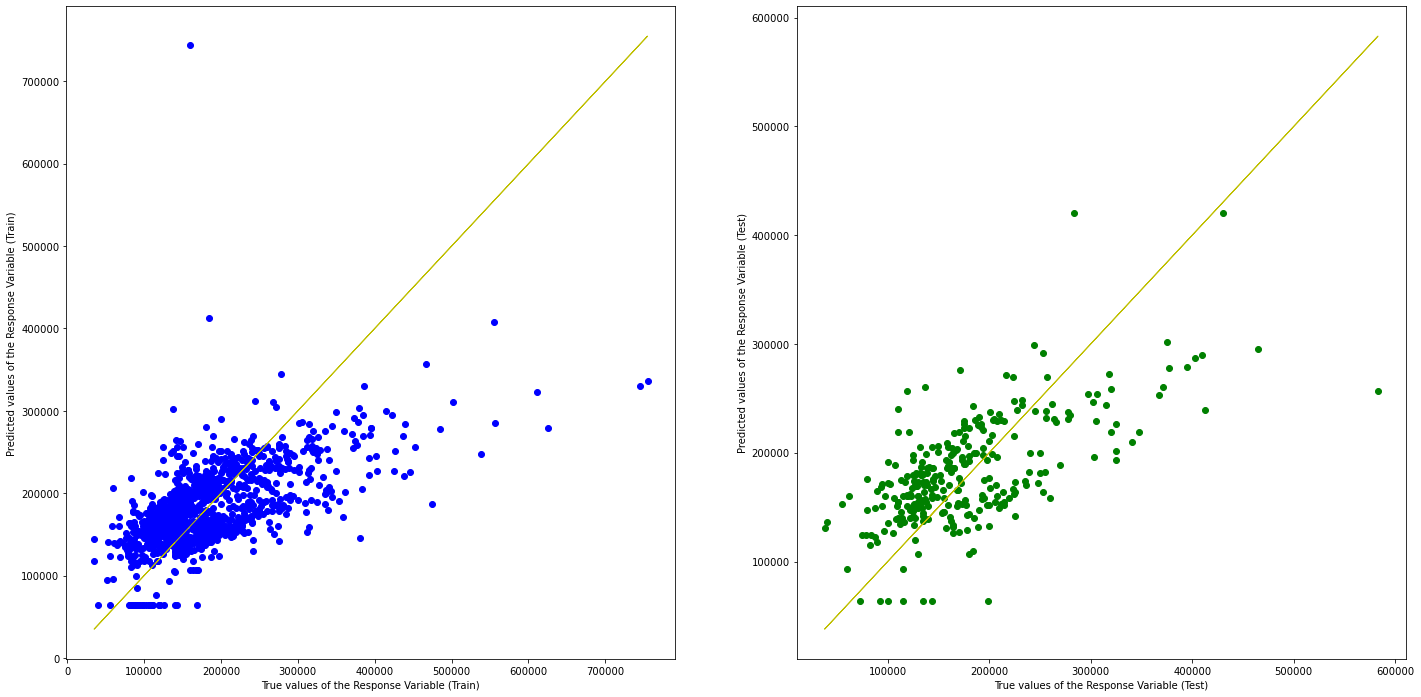

In [55]:
# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(TotalBsmtSF, SalePrice, test_size = 0.20)

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: c = ', linreg.intercept_)
print('Coefficients of Regression \t: d = ', linreg.coef_)
print()

# Predict Total values corresponding to HP
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mean_squared_error(y_test, y_test_pred)))
print()

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'y-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'y-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

Intercept of Regression 	: b =  [70489.95230947]
Coefficients of Regression 	: a =  [[233.1290363]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.38924376205082056
Mean Squared Error (MSE) 	: 3912242734.5621815
Root Mean Squared Error (RMSE) 	: 62547.92350320018

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.38519401620926863
Mean Squared Error (MSE) 	: 3629416722.8760185
Root Mean Squared Error (RMSE) 	: 60244.64061537772



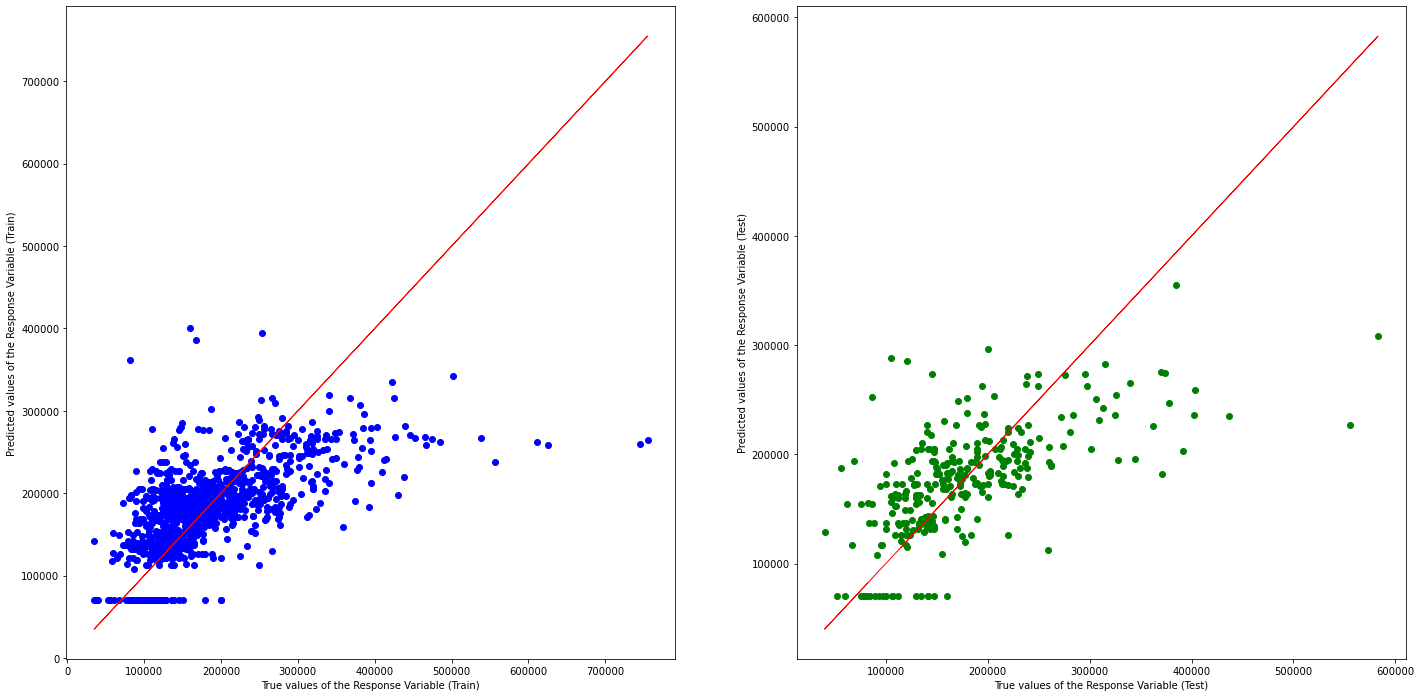

In [38]:
# Split the Dataset into Train and Test
X1_train, X1_test, y1_train, y1_test = train_test_split(GarageArea, SalePrice, test_size = 0.20)

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X1_train, y1_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Predict Total values corresponding to HP
y_train_pred = linreg.predict(X1_train)
y_test_pred = linreg.predict(X1_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X1_train, y1_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y1_train, y_train_pred))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mean_squared_error(y1_train, y_train_pred)))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X1_test, y1_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y1_test, y_test_pred))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mean_squared_error(y1_test, y_test_pred)))
print()

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y1_train, y_train_pred, color = "blue")
axes[0].plot(y1_train, y1_train, 'r-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y1_test, y_test_pred, color = "green")
axes[1].plot(y1_test, y1_test, 'r-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

GrLivArea would be the best model since it consistently gives the least root mean squared error with SalePrice

# Problem 3 : Refining the Models to Predict SalePrice
#### In this problem, you will consider finer details of the dataset and the variables to refine the model to predict SalePrice.
> (a) Find the houses (rows) that are “outliers” for GrLivArea and/or SalePrice. This means outliers for GrLivArea
UNION outliers for SalePrice in a set notation. Remove all these “outliers” from the dataset so that it is clean.

> (b) In the outlier-free dataset, create Train and Test sets with an 80:20 ratio, and fit a Linear Regression model on
the Train set to predict SalePrice using GrLivArea. Print the model coefficients and plot the regression line.

> (c) Check the Goodness of Fit of the model on the Train set and Prediction Accuracy of the model on the Test set.
Do you think this model is better than the model obtained in Problem 1 for the same variables? Briefly justify

In [33]:
jointDF = pd.concat([SalePrice, GrLivArea], axis = 1).reindex(GrLivArea.index)

# Outlier is any data points outside the inner lower/higher fence
# calculated by 1 Step above 75th percentile and 1 Step below 25th percentile
# Step = 1.5 * IQR 

Q1 = jointDF.quantile(0.25) 
Q3 = jointDF.quantile(0.75)

IQR = Q3 - Q1

clean_df= jointDF[~((jointDF < (Q1 - 1.5 * IQR)) |(jointDF > (Q3 + 1.5 * IQR))).any(axis=1)]
clean_df.describe()

clean_df

,SalePrice,GrLivArea
0,208500,1710
1,181500,1262
2,223500,1786
3,140000,1717
4,250000,2198
...,...,...
1455,175000,1647
1456,210000,2073
1457,266500,2340
1458,142125,1078


In [34]:
clean_SalePrice = pd.DataFrame(clean_df['SalePrice'])
clean_GrLivArea = pd.DataFrame(clean_df['GrLivArea'])
clean_SalePrice

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000
...,...
1455,175000
1456,210000
1457,266500
1458,142125


Intercept of Regression 	: b =  [32032.15044987]
Coefficients of Regression 	: a =  [[94.34277956]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.47814964246584324
Mean Squared Error (MSE) 	: 1818603990.201359
Root Mean Squared Error (RMSE) 	: 42645.09338952559

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.4729274186075829
Mean Squared Error (MSE) 	: 1724028555.2784054
Root Mean Squared Error (RMSE) 	: 41521.42284747002



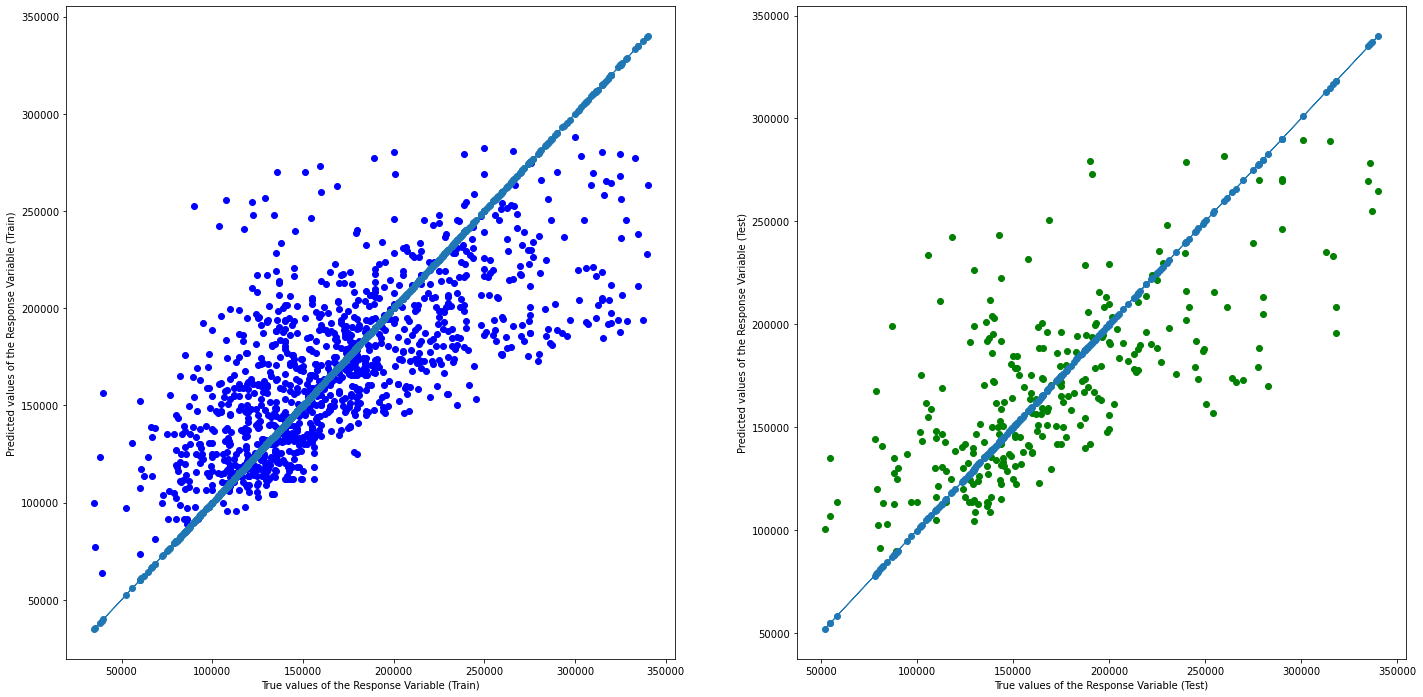

In [36]:
# Split the Dataset into Train and Test
X1_train, X1_test, y1_train, y1_test = train_test_split(clean_GrLivArea, clean_SalePrice, test_size = 0.20)

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X1_train, y1_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Predict Total values corresponding to HP
y_train_pred = linreg.predict(X1_train)
y_test_pred = linreg.predict(X1_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X1_train, y1_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y1_train, y_train_pred))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mean_squared_error(y1_train, y_train_pred)))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X1_test, y1_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y1_test, y_test_pred))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mean_squared_error(y1_test, y_test_pred)))
print()

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y1_train, y_train_pred, color = "blue")
axes[0].plot(y1_train, y1_train, 'o-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y1_test, y_test_pred, color = "green")
axes[1].plot(y1_test, y1_test, 'o-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

This model is much better than the previous model, since the root mean squared error is much lesser than the other model